# ASTRO 361 Lab 2 - Statistics
## Student Experiment
### Jimmy Lechtner - jameslec

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

# Exercse 1

In [3]:
N = 100 # number of trials
draw = np.random.randint(2, size=N) # From jupyter example
successes = len(draw[np.where(draw == 1)])
print('Observed Probability =', float(successes) / N)

('Observed Probability =', 0.52)


### D)

In [4]:
N = 20 # number of trials per set
M = 100 # number of sets
sums = np.zeros(N)
total_successes = 0
# Min and max are just for fun, not required by instructions
minimum = N
maximum = 0
for i in range(0,M):
    draw = np.random.randint(2, size=N)
    successes = len(draw[np.where(draw == 1)])
    sums[successes] += 1
    total_successes += successes
    if (successes > maximum):
        maximum = successes
    if (successes < minimum):
        minimum = successes
        
sums /= M # Gives frequency from 0 - 1 prob. rather than actual count
avg = float(total_successes) / (M * N)
print('(Calculated Over', M*N, 'Trials)')
print('Net Success Probability = ', avg)
print('Minimum # of Sucesses in a Set:', minimum)
print('Maxmimum # of Sucesses in a Set:', maximum)

('(Calculated Over', 2000, 'Trials)')
('Net Success Probability = ', 0.5015)
('Minimum # of Sucesses in a Set:', 5)
('Maxmimum # of Sucesses in a Set:', 16)


In [5]:
from scipy.misc import factorial
def PNx(p, N): # Taken from example jupyter, but edited to include probability parameter
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((1-p)**(N-x))*((p)**x)
    return PNx

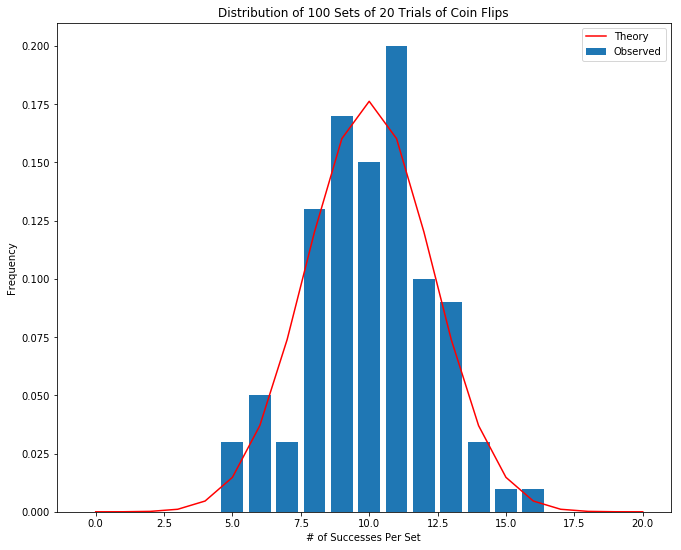

In [6]:
# Plotting Code
plt.plot(np.arange(N+1), PNx(0.5, N), color='r')
plt.bar(np.arange(N), sums)
plt.xlabel('# of Successes Per Set')
plt.ylabel('Frequency')
plt.title('Distribution of ' + str(M) + ' Sets of ' + str(N) + ' Trials of Coin Flips')
plt.legend(['Theory', 'Observed'])

### F)

In [7]:
def expected_value(x, px, N):
    exp = 0
    for i in range(0, N):
        exp += x*px
    print('Expected Value for', N, 'Flips:', exp)
    return exp

# Since a successful result is 1 and unsuccessful is 0, our value of x in xP(x) = 1. The 
# coin flip idea tells us that P(x) = 0.5. Overall we get: sum(0->N) xP(x)
expected_value(1, 0.5, 20)
expected_value(1, 0.5, 40)

('Expected Value for', 20, 'Flips:', 10.0)
('Expected Value for', 40, 'Flips:', 20.0)


20.0

# Exercise 2

In [8]:
p = .01
N2 = 100 # number of trials
M2 = 1000 # number of sets
sums2 = np.zeros(N2)
total_successes2 = 0
# Min and max are just for fun, not required by instructions
minimum2 = N2
maximum2 = 0
for i in range(0,M2):
    draw2 = np.random.randint(1/p, size=N2)
    successes2 = len(draw2[np.where(draw2 == 1)])
    sums2[successes2] += 1
    total_successes2 += successes2
    if (successes2 > maximum2):
        maximum2 = successes2
    if (successes2 < minimum2):
        minimum2 = successes2
        
sums2 /= M2 # Gives frequency from 0 - 1 prob. rather than actual count
avg2 = total_successes2 / (M2 * N2)
print('(Calculated Over', M2*N2, 'Trials)')
print('Net Success Probability = ', avg2)
print('Minimum # of Sucesses in a Set:', minimum2)
print('Maxmimum # of Sucesses in a Set:', maximum2)

('(Calculated Over', 100000, 'Trials)')
('Net Success Probability = ', 0)
('Minimum # of Sucesses in a Set:', 0)
('Maxmimum # of Sucesses in a Set:', 5)


In [9]:
def poisson_PNx(p, N):
    x = (np.arange(N+1))
    lam = N*p
    PNx = (lam)**x * np.exp(-1*lam) / factorial(x)
    return PNx

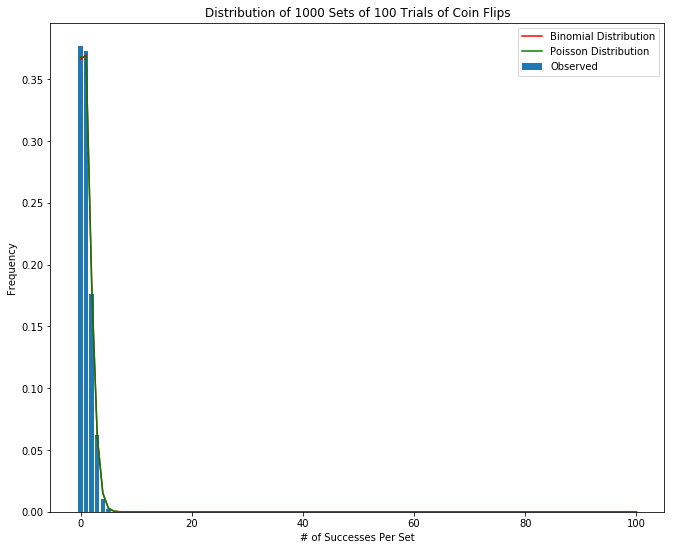

In [10]:
# Plotting Code
plt.plot(np.arange(N2+1), PNx(p, N2), color='r')
plt.plot(np.arange(N2+1), poisson_PNx(p, N2), color='g')
plt.bar(np.arange(N2), sums2)
plt.xlabel('# of Successes Per Set')
plt.ylabel('Frequency')
plt.title('Distribution of ' + str(M2) + ' Sets of ' + str(N2) + ' Trials of Coin Flips')
plt.legend(['Binomial Distribution', 'Poisson Distribution', 'Observed'])

### D) Calculating the Variance

In [11]:
squared = sums2**2
# First: Expectation value of x^2
# Second: Expectation value of x... squared



first = 0
for i in range(N2):
    first += i**2 * sums2[i]
    
second = 0
for i in range(N2):
    second += i * sums2[i]
second = second**2

var = first - second

mean = 0
for i in range(N2):
    mean += i * sums2[i]

print('<x^2>:', first)
print('<x>^2:', second)
print('Variance:', var)
print('Mean:', mean)

('<x^2>:', 1.845)
('<x>^2:', 0.92352100000000015)
('Variance:', 0.92147899999999983)
('Mean:', 0.96100000000000008)


In [12]:
# In the poisson distribution, we should see that mean and variance are equal to E(x)
def get_set(p):
    N2 = 100 # number of trials
    M2 = 1000 # number of sets
    sums2 = np.zeros(N2)
    total_successes2 = 0
    # Min and max are just for fun, not required by instructions
    minimum2 = N2
    maximum2 = 0
    for i in range(0,M2):
        draw2 = np.random.randint(1/p, size=N2)
        successes2 = len(draw2[np.where(draw2 == 1)])
        sums2[successes2] += 1
        total_successes2 += successes2
        if (successes2 > maximum2):
            maximum2 = successes2
        if (successes2 < minimum2):
            minimum2 = successes2

    sums2 /= M2 # Gives frequency from 0 - 1 prob. rather than actual count
    return sums2

def get_mean_variance(sums2):
    first = 0
    for i in range(N2):
        first += i**2 * sums2[i]

    second = 0
    for i in range(N2):
        second += i * sums2[i]
    second = second**2

    var = first - second

    mean = 0
    for i in range(N2):
        mean += i * sums2[i]
        
    return [mean, var]

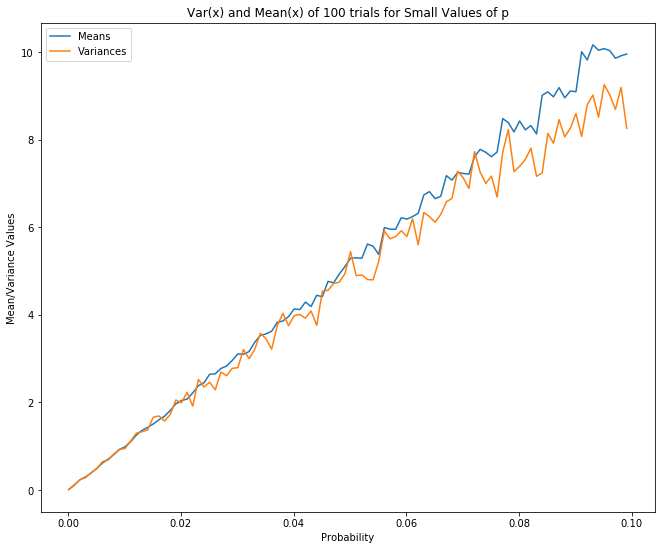

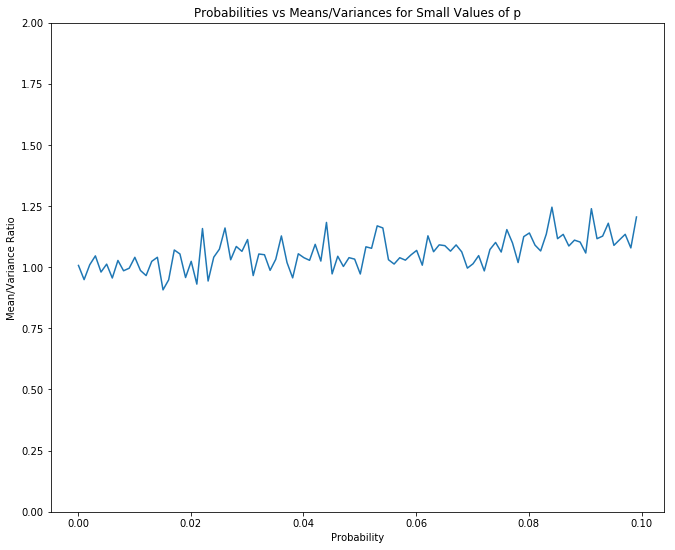

In [13]:
probabilities = np.arange(.0001, .1, .001)
means = np.zeros(len(probabilities))
variances = np.zeros(len(probabilities))

for w in range (0, len(probabilities)):
    sums = get_set(probabilities[w])
    means[w], variances[w] = get_mean_variance(sums)
    
plt.plot(probabilities, means)
plt.plot(probabilities, variances)
plt.title("Var(x) and Mean(x) of 100 trials for Small Values of p")
plt.legend(["Means", "Variances"])
plt.xlabel("Probability")
plt.ylabel("Mean/Variance Values")
plt.show()

plt.plot(probabilities, means/variances)
plt.title("Probabilities vs Means/Variances for Small Values of p")
plt.xlabel("Probability")
plt.ylabel("Mean/Variance Ratio")
plt.ylim(0,2)
plt.show()

